# Confusion Matrix 1

Die Erstellung der *Confusion Matrix* kann entweder mit *Scikit Learn* (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) oder mit *pandas_ml* (https://pandas-ml.readthedocs.io/en/latest/conf_mat.html) erfolgen. Scikit Learn sollte installiert sein. pandas_ml kann mit folgendem Befehl installiert werden: `conda install -c conda-forge pandas_ml`. Den jeweiligen Import nicht vergessen! Im Rahmen dieser Übung kommt die Scikit Learn-Variante zum Einsatz.

## Umsetzung mit Scikit Learn

In [1]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# actual values+
actual = [1,0,0,1,0,0,1,0,0,1]

# predicted values
predicted = [1,0,0,1,0,0,0,1,0,0]
print(confusion_matrix(actual,predicted))
tn, fp, fn ,tp = confusion_matrix(actual,predicted).reshape(-1)
print('True Negative',tn,'False Positive' ,fp,'False Negative' ,fn, 'True Positive' ,tp)

[[5 1]
 [2 2]]
True Negative 5 False Positive 1 False Negative 2 True Positive 2


**Default-Output von `confusion_matrix`:**
        
               Predicted
                 0    1
           0     5    1
    Actual    
           1     2    2
           
> Details liefert die API-Doku: **labels**:...If None is given, those that appear at least once in y_true or y_pred are used in sorted order.

**Output anpassen:**
Möchte man mit '1' (Positiv) beginnen, steht das Argument `labels` zur Verfügung:

In [3]:
print(confusion_matrix(actual,predicted,labels=[1,0]))
tp, fn, fp ,tn = confusion_matrix(actual,predicted).reshape(-1)
print(tp, fn, fp ,tn)

[[2 2]
 [1 5]]
5 1 2 2


## Task 15.1
Grundlage bildet Übung 14, Iris Dataset & Random Forest Classifier: Bereiten Sie das Dataset dahingehd auf, dass mit '0' (Setosa) und '1' (Versicolor) nur mehr zwei Klassen enthalten sind. Trainieren Sie im Anschluss wiederum den Random Forest Classifier und erstellen Sie die Confusion Matrix (CM) wie gezeigt. Durch die Reduktion auf zwei Klassen entspricht der CM-Output der uns bekannten Art und Weise.

In [4]:
iris = datasets.load_iris()
clf = RandomForestClassifier(max_depth=2, n_estimators=11)

df_target = pd.DataFrame(iris['target'],columns=['Species'])
df_data = pd.DataFrame(iris['data'], columns=iris.feature_names)
df_data = pd.concat([df_data,df_target], axis=1)
df_data = df_data[df_data.Species != 2]


X = df_data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df_data[['Species']].to_numpy().ravel()





In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=2, n_estimators=11)

In [6]:
y_pred=clf.predict(X_test)
print('Predicted: ',y_pred)
print('Actual:    ',y_test)
print(confusion_matrix(y_test,y_pred))

Predicted:  [1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0]
Actual:     [1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0]
[[15  0]
 [ 0 15]]


## Task 15.2
Um die CM ansprechend zu visualisieren, gibt es die Funktion `plot_confusion_matrix` (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix). **Wichtig**: Unter Umständen müssen Sie das Scikit Learn Modul aktualisieren, da die Funktion relativ neu ist (`conda update scikit-learn`).

In [8]:
from sklearn.metrics import plot_confusion_matrix

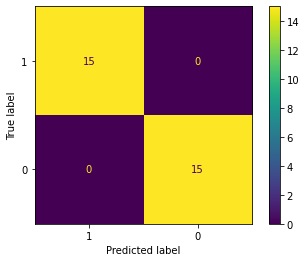

In [11]:
# Verwendung: Es braucht 3 Argumente:
#plot_confusion_matrix(clf, X_test, y_test, labels=[1,0])  
plot_confusion_matrix(clf, X_test, y_test, labels=[1,0])
#plt.show()  